#**Bangalore House Price Prediction**

![](https://i.imgur.com/j6FuBvD.jpg)

# **Description**

**What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?**

**Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.**

**For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.**

**Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.**

**House price prediction is important for several reasons:**

1. Informed Decision Making: Predicting house prices helps investors, homebuyers, and sellers make informed decisions about buying, selling, or holding properties, ensuring they maximize their returns and minimize risks.

2. Financial Planning: For homeowners, accurate house price prediction enables better financial planning by assessing the value of their primary asset and making decisions about refinancing, leveraging equity, or planning for retirement.

3. Market Stability: Predicting house prices assists policymakers and regulatory bodies in monitoring and maintaining market stability by identifying potential bubbles, implementing appropriate regulations, and ensuring sustainable growth.

4. Economic Indicator: Fluctuations in house prices are often indicative of broader economic trends. Predicting these trends helps economists and analysts gauge the health of the economy, anticipate inflationary pressures, and understand consumer sentiment.

5. Risk Management: Banks, lenders, and insurance companies use house price prediction models to assess the risk associated with mortgage lending, property insurance, and investment portfolios, enabling them to mitigate potential losses and maintain financial stability.

6. Urban Development: Predicting house prices informs urban planners and developers about demand patterns, guiding decisions on infrastructure development, zoning regulations, and the allocation of resources for sustainable urban growth.

7. Market Efficiency: Accurate house price prediction contributes to market efficiency by reducing information asymmetry and improving price discovery, thereby fostering fairer transactions and enhancing overall market transparency.

**Dataset description**:

1. Area_type - Description of the area
2. Availability - When it can be possessed or when it is ready
3. Location - Where it is located in Bengaluru
4. Size - BHK or Bedrooms
5. Society - To which society it belongs
6. Total_sqft - Size of the property in sq.ft
7. Bath - No. of Bathrooms
8. Balcony - No. of the Balcony
9. Price - Value of the property in lakhs (Indian Rupee - ₹)

Dataset link : https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

**importing Libraries**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [93]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [94]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#**Data assessing**

In [95]:
#shape of dataset
df.shape

(13320, 9)

In [96]:
#columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [97]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [98]:
#description stats of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [99]:
#unique values
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [100]:
#checking for duplicate values
df.duplicated().sum()

529

In [101]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [102]:
#checking for missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

**after exploring the dataset we will remove the missing values**

#**Exploratory Data Analysis**

**Univariate Analysis**

In [103]:
df["area_type"].value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

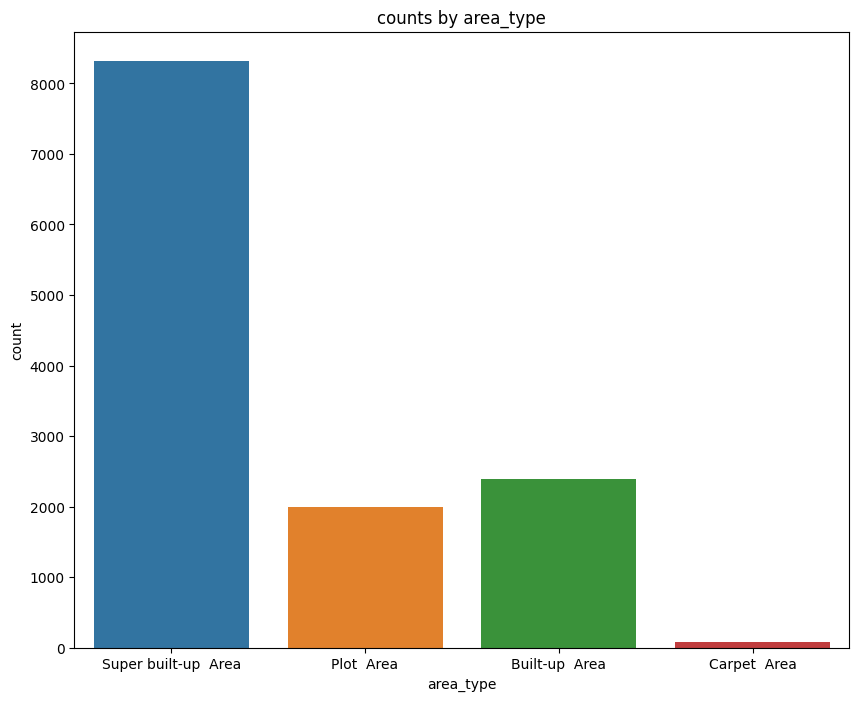

In [104]:
sns.countplot(data=df,x="area_type",hue="area_type")
plt.title("counts by area_type")
plt.show()

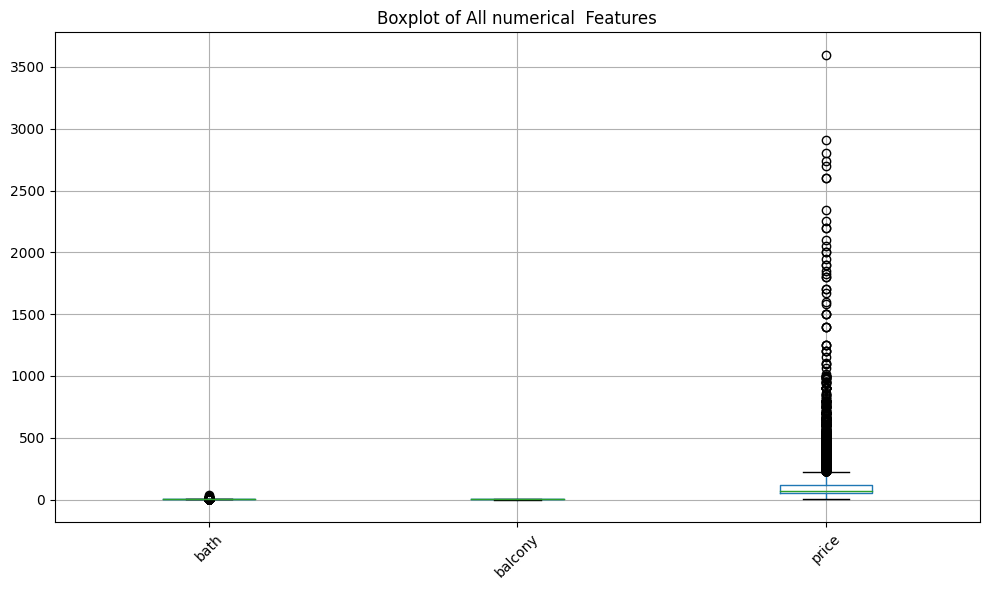

In [105]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Boxplot of All numerical  Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**we can see that price contains a lot of Outliers we will remove after understanding the data**

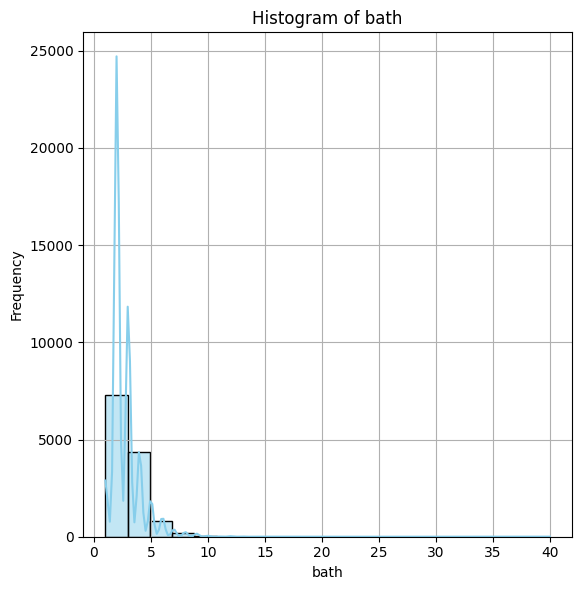

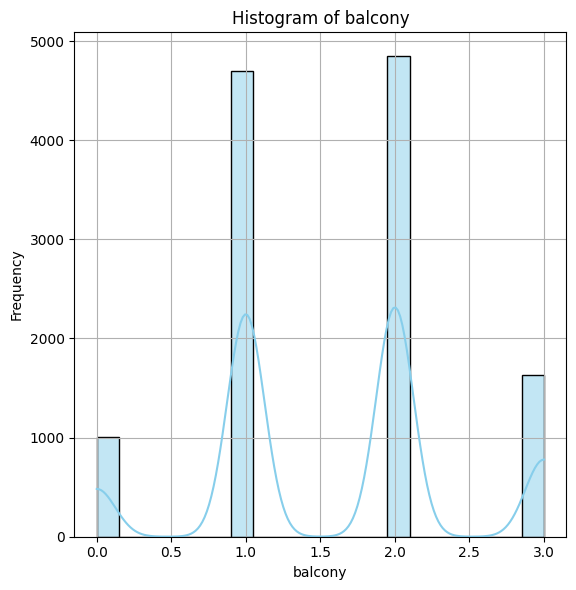

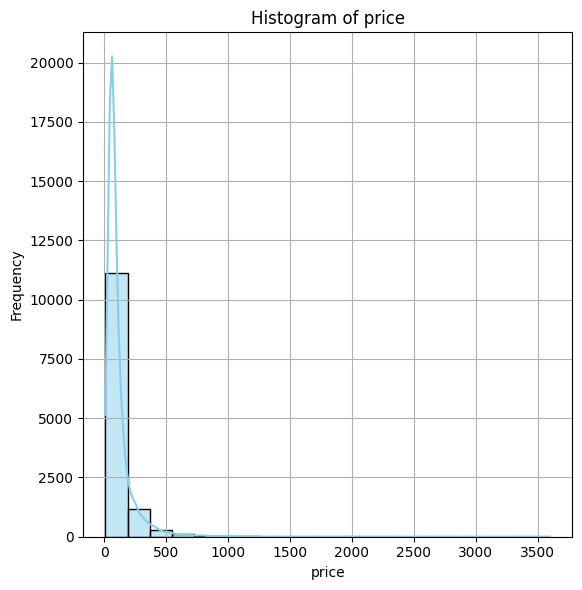

In [106]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is numerical
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(16,6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], bins=20, kde=True, color='skyblue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

**bath and price contains highly right skewness**

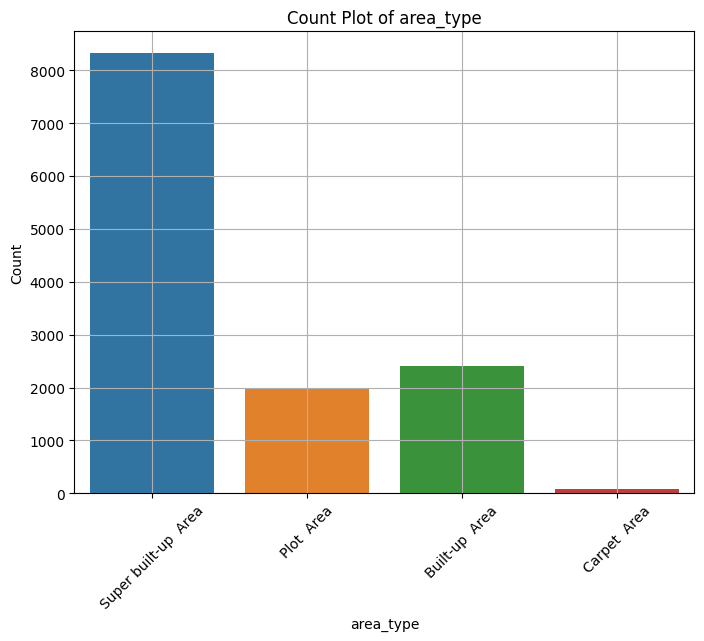

In [107]:
for column in df.columns:
  if df[column].dtype == 'object' and df[column].nunique()<10:
        # Plot count plot using seaborn
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, hue="area_type")
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

In [108]:
df["size"].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

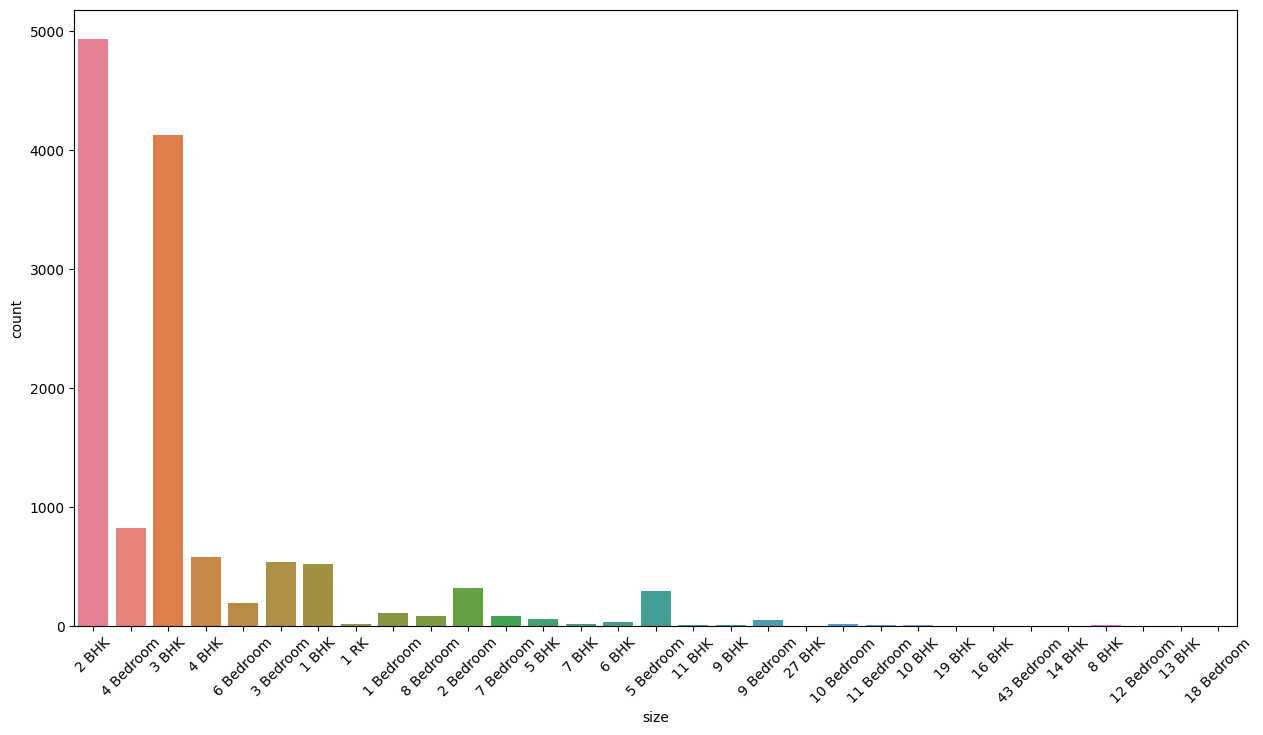

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="size",hue="size",legend=False)
plt.xticks(rotation=45)
plt.show()

**2BHK and 3BHK are mostly popular in Banglore**

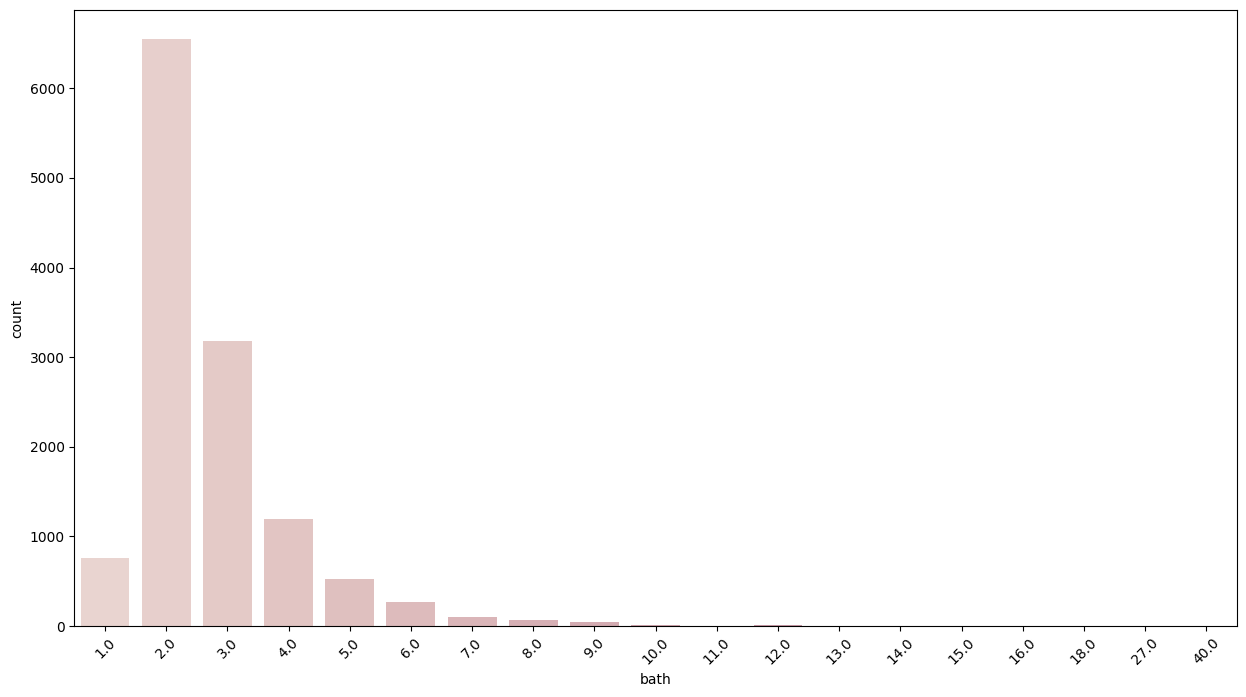

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="bath",hue="bath",legend=False)
plt.xticks(rotation=45)
plt.show()

**people prefer to have  minimum  2 bathroom in a house**

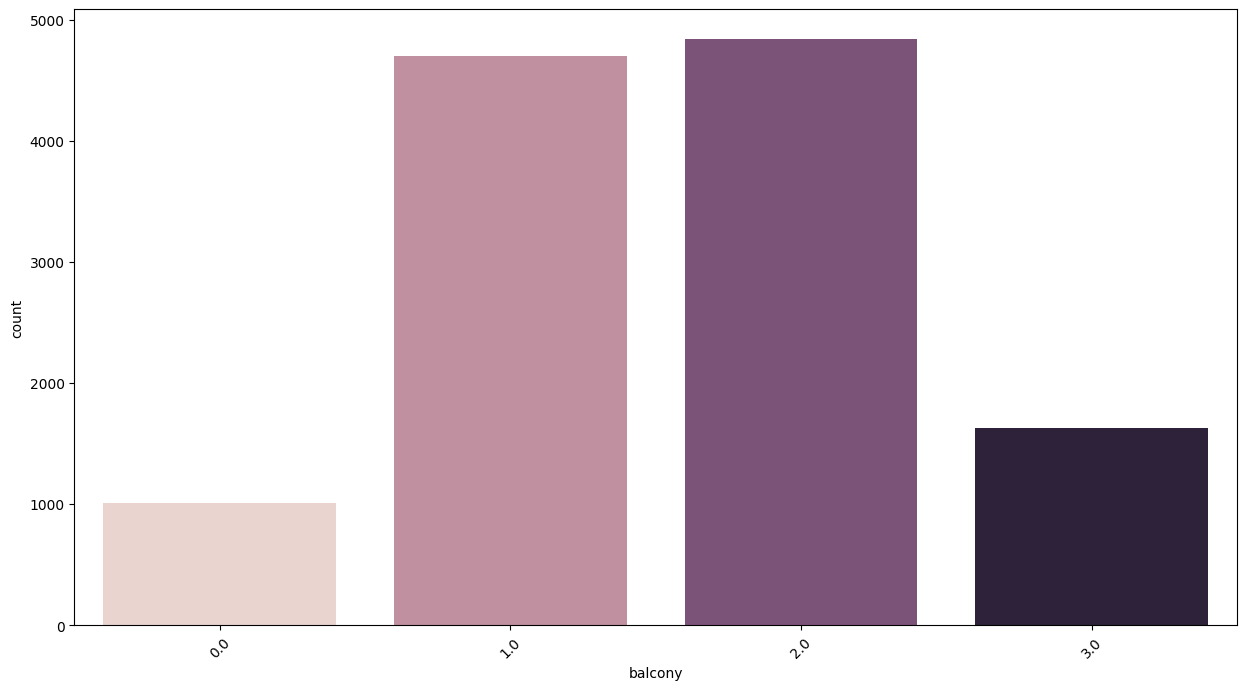

In [111]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="balcony",hue="balcony",legend=False)
plt.xticks(rotation=45)
plt.show()

**`1 or 2 balcony are enough for a House in Banglore**

In [112]:
df["balcony"].value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

**Bivariate Analysis**

In [113]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<Axes: xlabel='bath', ylabel='price'>

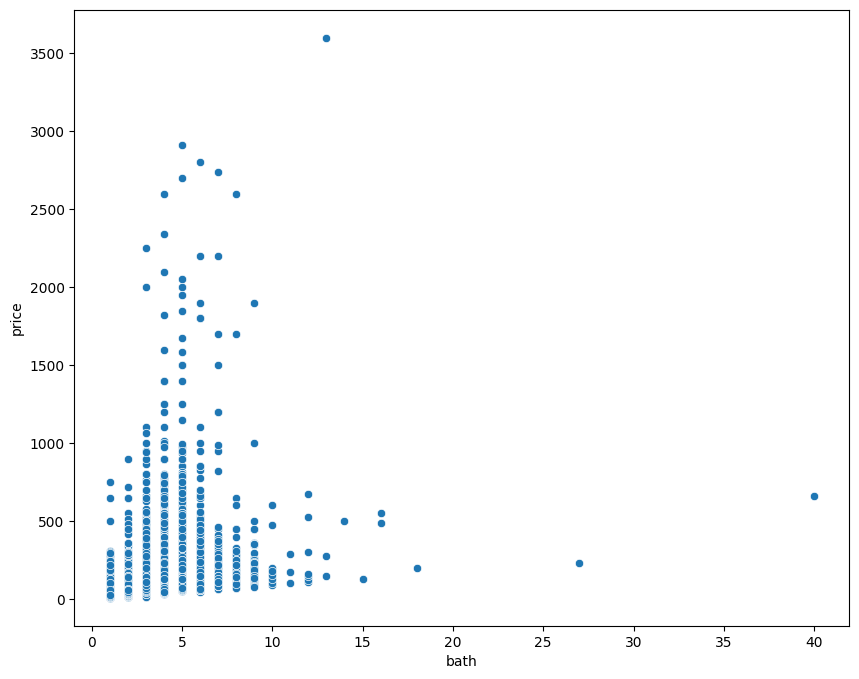

In [114]:
#does price depends on bath
sns.scatterplot(data=df,x="bath",y="price")

**bath between 2 to 6 price matters**

<Axes: xlabel='balcony', ylabel='price'>

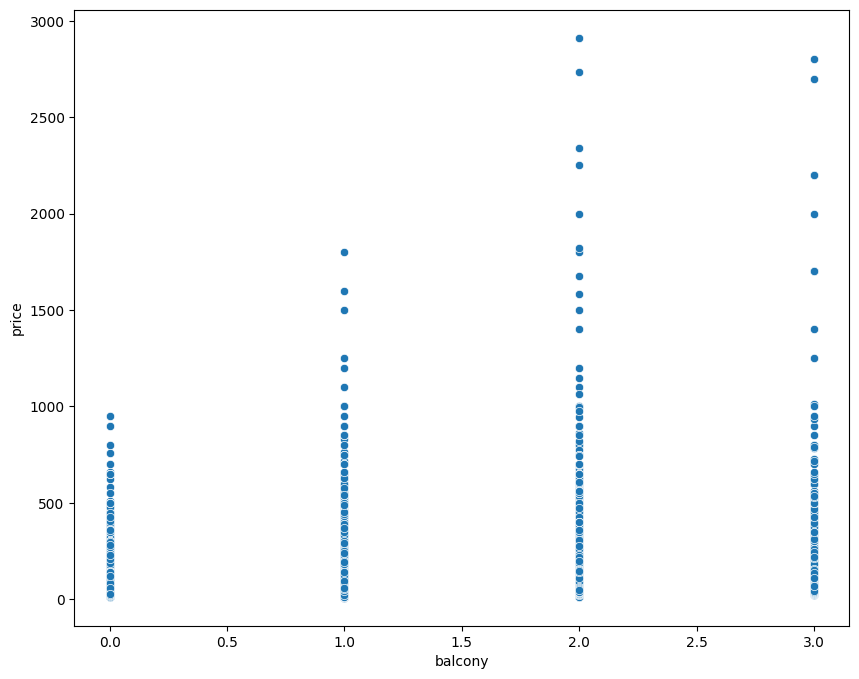

In [115]:
#does price depends on balcony
sns.scatterplot(data=df,x="balcony",y="price")

**price depends on balcony size**

**now lets make a heatmap between corelation between bath,balcony and	price**

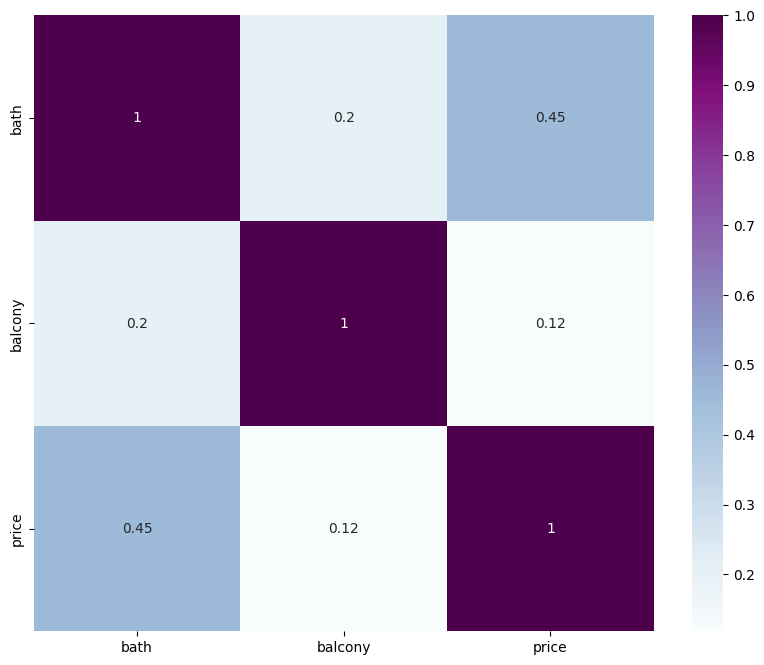

In [116]:
num_vars = ["bath","balcony","price"]
sns.heatmap(df[num_vars].corr(),cmap = "BuPu", annot=True)
plt.show()

**we can see that bath is more corelated with price than balcony**

In [117]:
#mean price by size
df.groupby("size")["price"].mean()

size
1 BHK          40.113397
1 Bedroom      73.118942
1 RK           28.122308
10 BHK        342.500000
10 Bedroom    561.250000
11 BHK        255.000000
11 Bedroom    160.000000
12 Bedroom    300.000000
13 BHK        275.000000
14 BHK        125.000000
16 BHK        550.000000
18 Bedroom    200.000000
19 BHK        490.000000
2 BHK          57.648223
2 Bedroom      95.558535
27 BHK        230.000000
3 BHK         105.946025
3 Bedroom     160.223888
4 BHK         281.280305
4 Bedroom     265.486232
43 Bedroom    660.000000
5 BHK         425.618644
5 Bedroom     253.195876
6 BHK         207.833333
6 Bedroom     226.455497
7 BHK         389.294118
7 Bedroom     214.256098
8 BHK         172.000000
8 Bedroom     209.666667
9 BHK         248.250000
9 Bedroom     240.847826
Name: price, dtype: float64

In [118]:
#mean price by area type
df.groupby("area_type")["price"].mean()

area_type
Built-up  Area          104.797763
Carpet  Area             89.502356
Plot  Area              210.520543
Super built-up  Area     94.315248
Name: price, dtype: float64

#**Data Cleaning**

In [119]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [120]:
#dropping society columns
df.drop("society",axis=1,inplace=True)

In [121]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [122]:
df[["balcony","bath"]].describe().T

,count,mean,std,min,25%,50%,75%,max
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0


filling the balcony with 1,bath columns with median and size columns with mode

In [123]:
df["balcony"].fillna(1,inplace=True)
df["bath"].fillna(2,inplace=True)

In [124]:
df["size"]=df["size"].fillna(df["size"].mode()[0])

In [125]:
df.dropna(inplace=True)

In [126]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [127]:
# Converting the size column to bhk
df["bhk"]=df["size"].str.split().str[0].astype(int)

In [128]:
df.drop("size",axis=1,inplace=True)

In [129]:
df["bhk"].value_counts()

2     5261
3     4654
4     1398
1      638
5      350
6      221
7       99
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

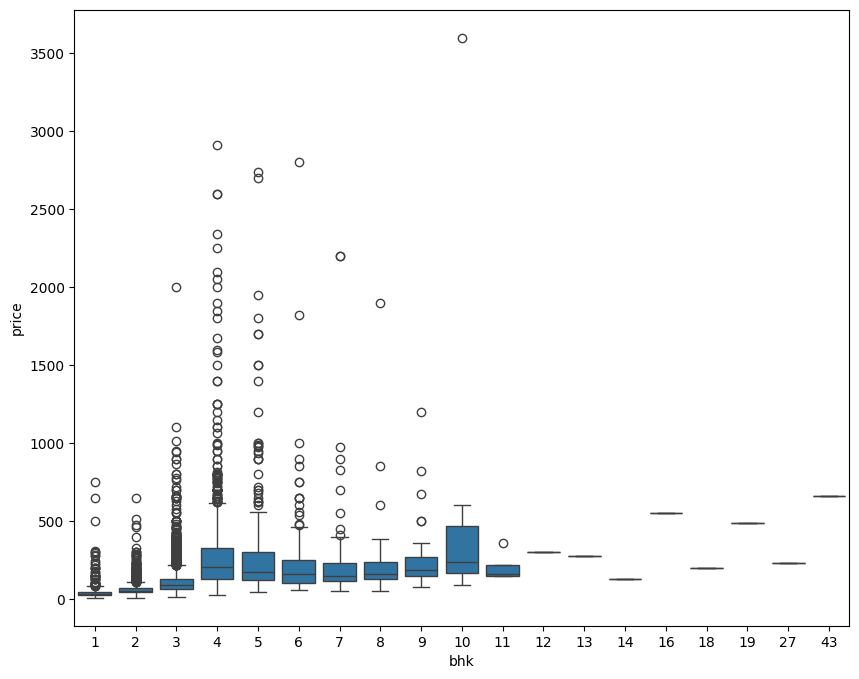

In [130]:
sns.boxplot(x = 'bhk', y = 'price', data = df)
plt.show()

In [131]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [132]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values

def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [133]:
# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isfloat)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,1.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,1.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,2.0,1.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


From the above we can see that total_sqft can be a range (say, 3090-5002). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion

In [134]:
# Converting the range values to integer values and removing other types of error

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [135]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)

In [136]:
new_df= df.drop('total_sqft', axis=1)

In [137]:
new_df.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


In [138]:
# Removing the rows in new_total_sqft column that hase None values
new_df.isna().sum()

area_type          0
availability       0
location           0
bath               0
balcony            0
price              0
bhk                0
new_total_sqft    46
dtype: int64

In [139]:
# Removing the rows in new_total_sqft column that hase None values
new_df.dropna(inplace=True)

#**Feature Engineering**

In [140]:
# Adding a new column of price_per_sqft
df1 = df.copy()

In [141]:
# In our dataset the price column is in Lakhs
df1["price_per_sqft"] = (df1["price"]*100000)/df1["new_total_sqft"]

In [142]:
df1.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000


In [143]:
# Checking unique values of 'location' column
df1["location"].nunique()

1305

In [144]:
df1.location =df1.location.apply(lambda x: x.strip())

In [145]:
# Calulating all the unqiue values in 'location' column
location_stats=df1["location"].value_counts()

In [146]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.location.unique()))

1061 1294


In [147]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

df1.location = df1.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.location.unique())

234

In [148]:
df1["location"].value_counts()

other               2933
Whitefield           524
Sarjapur  Road       379
Electronic City      289
Kanakpura Road       249
                    ... 
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 234, dtype: int64

In [149]:
# Checking the unique values in 'availability column'
df1["availability"].value_counts()

Ready To Move    10171
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [150]:
dates=df1["availability"].value_counts()

In [151]:
dates_not_ready=dates[dates<10000]

In [152]:
df1.availability = df1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

In [153]:
df1.availability.unique()

array(['Not Ready', 'Ready To Move'], dtype=object)

In [154]:
df1["availability"].value_counts()

Ready To Move    10171
Not Ready         2619
Name: availability, dtype: int64

In [155]:
df1["area_type"].value_counts()

Super built-up  Area    8316
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

**Since the column has only few unique values, we don't perform any operation**

#**Removing Outliers**

In [156]:
# Removing the rows that have 1 Room for less than 300sqft

df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2), len(df1))

12056 12790


In [157]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000


In [158]:
df2.price_per_sqft.describe()

count     12010.000000
mean       6363.478992
std        4226.847569
min         267.829813
25%        4250.000000
50%        5330.490405
75%        6968.280644
max      176470.588235
Name: price_per_sqft, dtype: float64

In [159]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):

    df_out = pd.DataFrame()

    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)

    return df_out


In [160]:
df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))

12056 9897


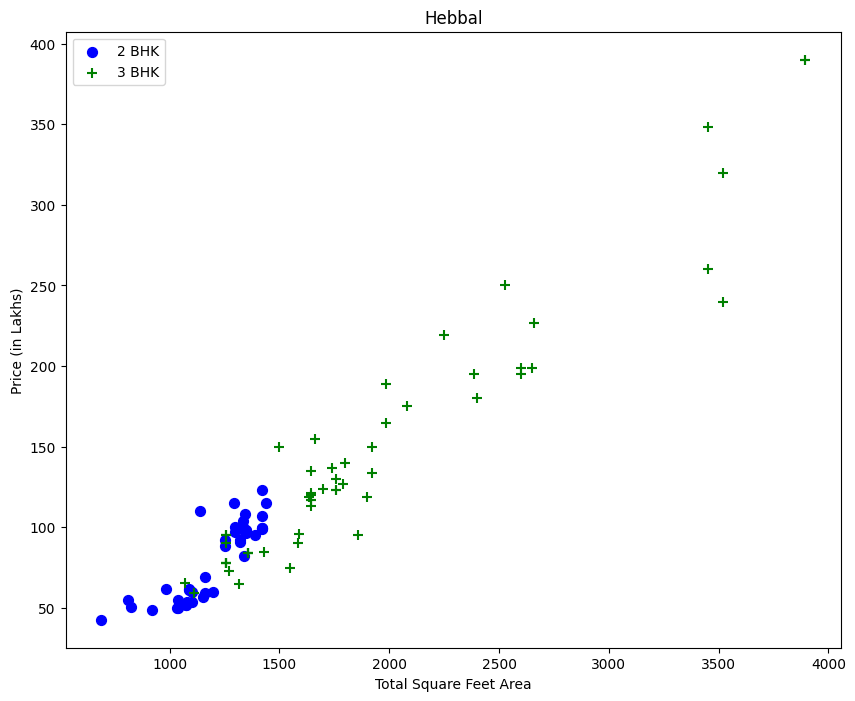

In [161]:
from matplotlib import rcParams as rcP
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (10,8)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3, 'Hebbal')

In [162]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

9897 7052


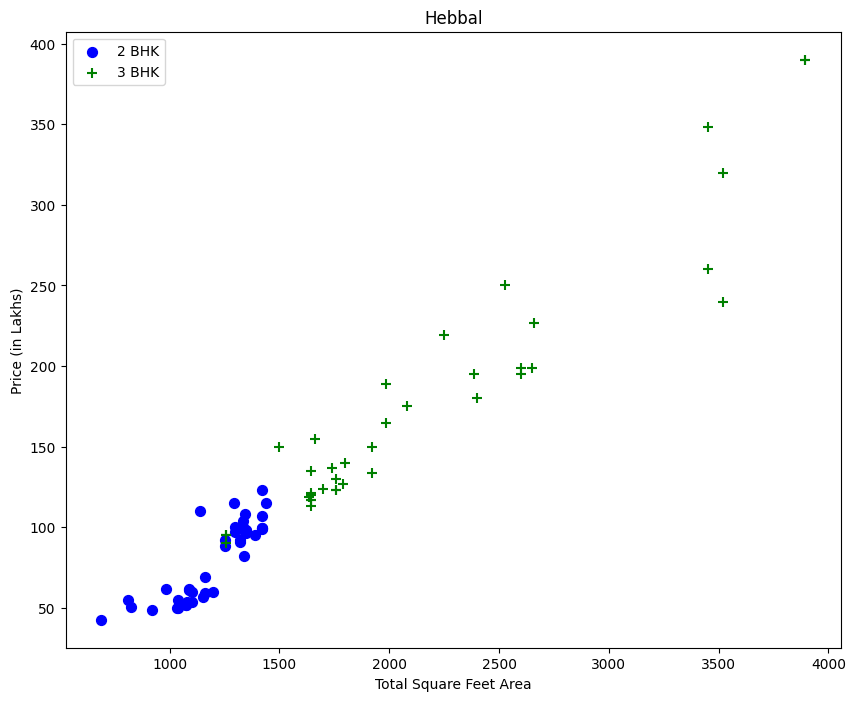

In [163]:
plot_scatter_chart(df4, 'Hebbal')

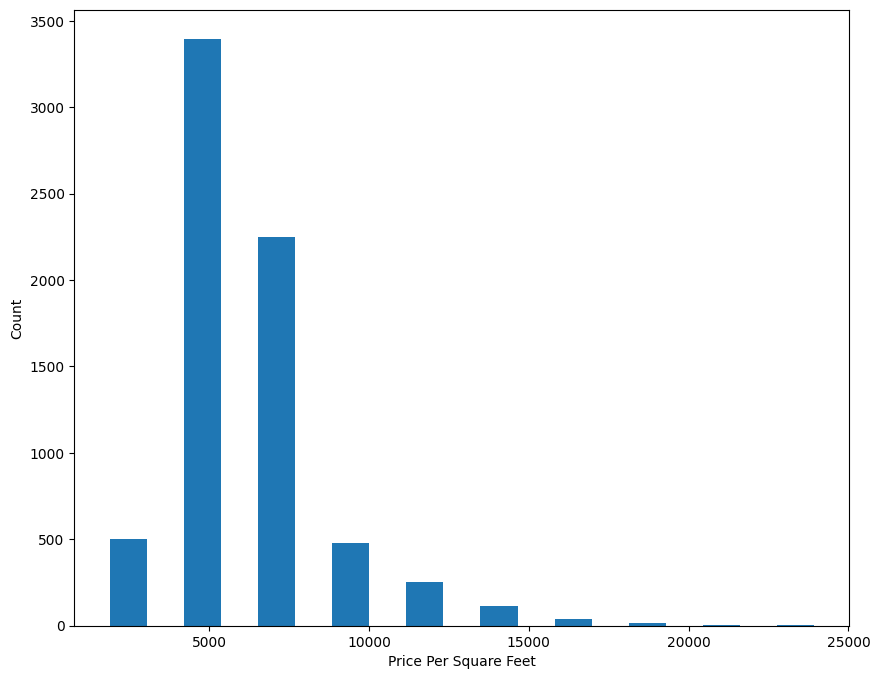

In [164]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

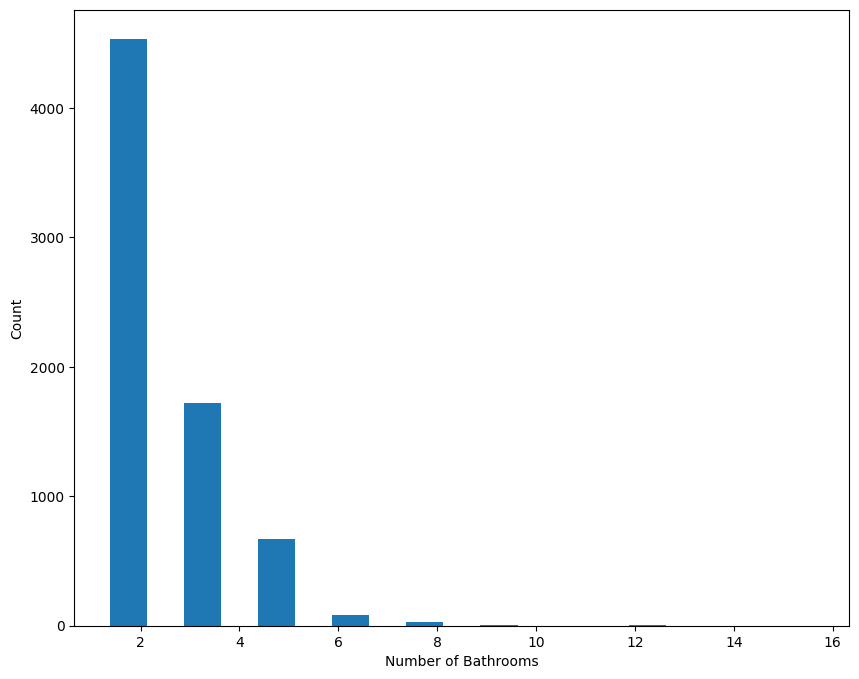

In [165]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [166]:
# Removing the rows that have 'bath' greater than 'bhk'+2
df5 = df4[df4.bath<(df4.bhk+2)]
print(len(df4), len(df5))

7052 6971


In [167]:
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,2850,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,Not Ready,1st Block Jayanagar,1630,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,Not Ready,1st Block Jayanagar,1200,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,Not Ready,1st Block Jayanagar,1235,2.0,2.0,148.0,2,1235.0,11983.805668


#**Feature Selection**

In [168]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop(columns=['price_per_sqft','total_sqft'], axis=1)

In [169]:
df6.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0


In [171]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.location).drop('other', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [172]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [173]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [174]:
df6.drop(['area_type','availability','location'], axis='columns', inplace=True)
df6.head()

,bath,balcony,price,bhk,new_total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,4.0,1.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,0.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# Size of the dataset
df6.shape

(6971, 242)

In [176]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

#**Model Building**

In [191]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [195]:
# Creating Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [196]:
model.score(X_test, y_test)*100

80.96956416392165

In [197]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Ready To Move', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area'],
      dtype='object', length=241)

In [199]:
# For finding the appropriate area_type
np.where(X.columns=='Built-up  Area')[0][0]

238

In [201]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

237

#**Prediction**

In [202]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):

    loc_index, area_index, avail_index = -1,-1,-1

    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])

    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]

    if availability!='Not Ready':
        avail_index = np.where(X.columns==availability)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft

    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1

    return model.predict([x])[0]

In [203]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Block Jayanagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

174.0200716060304

In [204]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

84.3358866476722

In [205]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

182.2232582136548